In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mplt
import matplotlib as plt
import datetime as dati
from math import pi
from wordcloud import WordCloud
from sklearn.metrics import log_loss

from sklearn.model_selection import train_test_split

#Modelos
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
sns.set()

In [140]:
dataset_train = pd.read_csv("./datos-tp2-2c2020-main/Features_agrupados_Train_Lucas.csv")
dataset_train

,Opportunity_ID,ASP_sum,ASP_mean,ASP_median,ASP_std,ASP_max,ASP_min,ASP_(converted)_sum,ASP_(converted)_mean,ASP_(converted)_median,ASP_(converted)_std,ASP_(converted)_max,ASP_(converted)_min,TRF_sum,TRF_mean,TRF_median,TRF_std,TRF_max,TRF_min,Total_Amount_sum,Total_Amount_mean,Total_Amount_median,Total_Amount_std,Total_Amount_max,Total_Amount_min,Total_Taxable_Amount_sum,Total_Taxable_Amount_mean,Total_Taxable_Amount_median,Total_Taxable_Amount_std,Total_Taxable_Amount_max,Total_Taxable_Amount_min,Total_Amount_converted_sum,Total_Amount_converted_mean,Total_Amount_converted_median,Total_Amount_converted_std,Total_Amount_converted_max,Total_Amount_converted_min,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Account_Created_Date,Last_Modified_Date,Opportunity_Created_Date,Quote_Expiry_Date,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Region_mean_mean_x,Region_mean_median_x,Region_mean_max_x,Region_mean_min_x,Region_count_mean_x,Region_count_median_x,Region_count_max_x,Region_count_min_x,Territory_mean_mean_x,Territory_mean_median_x,Territory_mean_max_x,Territory_mean_min_x,Territory_count_mean_x,Territory_count_median_x,Territory_count_max_x,Territory_count_min_x,Product_Name_mean_mean_x,Product_Name_mean_median_x,Product_Name_mean_max_x,Product_Name_mean_min_x,Product_Name_count_mean_x,Product_Name_count_median_x,Product_Name_count_max_x,Product_Name_count_min_x,Account_Owner_mean_mean_x,Account_Owner_mean_median_x,Account_Owner_mean_max_x,Account_Owner_mean_min_x,Account_Owner_count_mean_x,Account_Owner_count_median_x,Account_Owner_count_max_x,Account_Owner_count_min_x,Bureaucratic_Code_mean_mean_x,Bureaucratic_Code_mean_median_x,Bureaucratic_Code_mean_max_x,Bureaucratic_Code_mean_min_x,Bureaucratic_Code_count_mean_x,Bureaucratic_Code_count_median_x,Bureaucratic_Code_count_max_x,Bureaucratic_Code_count_min_x,Billing_Country_mean_mean_x,Billing_Country_mean_median_x,Billing_Country_mean_max_x,Billing_Country_mean_min_x,Billing_Country_count_mean_x,Billing_Country_count_median_x,Billing_Country_count_max_x,Billing_Country_count_min_x,Account_Name_mean_mean_x,Account_Name_mean_median_x,Account_Name_mean_max_x,Account_Name_mean_min_x,Account_Name_count_mean_x,Account_Name_count_median_x,Account_Name_count_max_x,Account_Name_count_min_x,Opportunity_Owner_mean_mean_x,Opportunity_Owner_mean_median_x,Opportunity_Owner_mean_max_x,Opportunity_Owner_mean_min_x,Opportunity_Owner_count_mean_x,Opportunity_Owner_count_median_x,Opportunity_Owner_count_max_x,Opportunity_Owner_count_min_x,Quote_Type_mean_mean_x,Quote_Type_mean_median_x,Quote_Type_mean_max_x,Quote_Type_mean_min_x,Quote_Type_count_mean_x,Quote_Type_count_median_x,Quote_Type_count_max_x,Quote_Type_count_min_x,Delivery_Terms_mean_mean_x,Delivery_Terms_mean_median_x,Delivery_Terms_mean_max_x,Delivery_Terms_mean_min_x,Delivery_Terms_count_mean_x,Delivery_Terms_count_median_x,Delivery_Terms_count_max_x,Delivery_Terms_count_min_x,Product_Family_mean_mean_x,Product_Family_mean_median_x,Product_Family_mean_max_x,Product_Family_mean_min_x,Product_Family_count_mean_x,Product_Family_count_median_x,Product_Family_count_max_x,Product_Family_count_min_x,Month_mean_mean_x,Month_mean_median_x,Month_mean_max_x,Month_mean_min_x,Month_count_mean_x,Month_count_median_x,Month_count_max_x,Month_count_min_x,Delivery_Quarter_mean_mean_x,Delivery_Quarter_mean_median_x,Delivery_Quarter_mean_max_x,Delivery_Quarter_mean_min_x,Delivery_Quarter_count_mean_x,Delivery_Quarter_count_median_x,Delivery_Quarter_count_max_x,Delivery_Quarter_count_min_x,acount_age,delta_planed,Region_mean_mean_y,Region_mean_median_y,Region_mean_max_y,Region_mean_min_y,Region_count_mean_y,Region_count_median_y,Region_count_max_y,Region_count_min_y,Territory_mean_mean_y,Territory_mean_median_y,Territory_mean_max_y,Territory_mean_min_y,Territory_count_mean_y,Territory_count_median_y,Territory_count_max_y,Territory_count_min_y,Product_Name_mean_m

In [141]:
dataset_test = pd.read_csv("./datos-tp2-2c2020-main/Features_agrupados_Test_Lucas.csv")
dataset_test

,Opportunity_ID,ASP_sum,ASP_mean,ASP_median,ASP_std,ASP_max,ASP_min,ASP_(converted)_sum,ASP_(converted)_mean,ASP_(converted)_median,ASP_(converted)_std,ASP_(converted)_max,ASP_(converted)_min,TRF_sum,TRF_mean,TRF_median,TRF_std,TRF_max,TRF_min,Total_Amount_sum,Total_Amount_mean,Total_Amount_median,Total_Amount_std,Total_Amount_max,Total_Amount_min,Total_Taxable_Amount_sum,Total_Taxable_Amount_mean,Total_Taxable_Amount_median,Total_Taxable_Amount_std,Total_Taxable_Amount_max,Total_Taxable_Amount_min,Total_Amount_converted_sum,Total_Amount_converted_mean,Total_Amount_converted_median,Total_Amount_converted_std,Total_Amount_converted_max,Total_Amount_converted_min,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Account_Created_Date,Last_Modified_Date,Opportunity_Created_Date,Quote_Expiry_Date,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Region_mean_mean_x,Region_mean_median_x,Region_mean_max_x,Region_mean_min_x,Region_count_mean_x,Region_count_median_x,Region_count_max_x,Region_count_min_x,Territory_mean_mean_x,Territory_mean_median_x,Territory_mean_max_x,Territory_mean_min_x,Territory_count_mean_x,Territory_count_median_x,Territory_count_max_x,Territory_count_min_x,Product_Name_mean_mean_x,Product_Name_mean_median_x,Product_Name_mean_max_x,Product_Name_mean_min_x,Product_Name_count_mean_x,Product_Name_count_median_x,Product_Name_count_max_x,Product_Name_count_min_x,Account_Owner_mean_mean_x,Account_Owner_mean_median_x,Account_Owner_mean_max_x,Account_Owner_mean_min_x,Account_Owner_count_mean_x,Account_Owner_count_median_x,Account_Owner_count_max_x,Account_Owner_count_min_x,Bureaucratic_Code_mean_mean_x,Bureaucratic_Code_mean_median_x,Bureaucratic_Code_mean_max_x,Bureaucratic_Code_mean_min_x,Bureaucratic_Code_count_mean_x,Bureaucratic_Code_count_median_x,Bureaucratic_Code_count_max_x,Bureaucratic_Code_count_min_x,Billing_Country_mean_mean_x,Billing_Country_mean_median_x,Billing_Country_mean_max_x,Billing_Country_mean_min_x,Billing_Country_count_mean_x,Billing_Country_count_median_x,Billing_Country_count_max_x,Billing_Country_count_min_x,Account_Name_mean_mean_x,Account_Name_mean_median_x,Account_Name_mean_max_x,Account_Name_mean_min_x,Account_Name_count_mean_x,Account_Name_count_median_x,Account_Name_count_max_x,Account_Name_count_min_x,Opportunity_Owner_mean_mean_x,Opportunity_Owner_mean_median_x,Opportunity_Owner_mean_max_x,Opportunity_Owner_mean_min_x,Opportunity_Owner_count_mean_x,Opportunity_Owner_count_median_x,Opportunity_Owner_count_max_x,Opportunity_Owner_count_min_x,Quote_Type_mean_mean_x,Quote_Type_mean_median_x,Quote_Type_mean_max_x,Quote_Type_mean_min_x,Quote_Type_count_mean_x,Quote_Type_count_median_x,Quote_Type_count_max_x,Quote_Type_count_min_x,Delivery_Terms_mean_mean_x,Delivery_Terms_mean_median_x,Delivery_Terms_mean_max_x,Delivery_Terms_mean_min_x,Delivery_Terms_count_mean_x,Delivery_Terms_count_median_x,Delivery_Terms_count_max_x,Delivery_Terms_count_min_x,Product_Family_mean_mean_x,Product_Family_mean_median_x,Product_Family_mean_max_x,Product_Family_mean_min_x,Product_Family_count_mean_x,Product_Family_count_median_x,Product_Family_count_max_x,Product_Family_count_min_x,Month_mean_mean_x,Month_mean_median_x,Month_mean_max_x,Month_mean_min_x,Month_count_mean_x,Month_count_median_x,Month_count_max_x,Month_count_min_x,Delivery_Quarter_mean_mean_x,Delivery_Quarter_mean_median_x,Delivery_Quarter_mean_max_x,Delivery_Quarter_mean_min_x,Delivery_Quarter_count_mean_x,Delivery_Quarter_count_median_x,Delivery_Quarter_count_max_x,Delivery_Quarter_count_min_x,acount_age,delta_planed,Region_mean_mean_y,Region_mean_median_y,Region_mean_max_y,Region_mean_min_y,Region_count_mean_y,Region_count_median_y,Region_count_max_y,Region_count_min_y,Territory_mean_mean_y,Territory_mean_median_y,Territory_mean_max_y,Territory_mean_min_y,Territory_count_mean_y,Territory_count_median_y,Territory_count_max_y,Territory_count_min_y,Product_Name_mean_m

In [142]:
trainCSV = pd.read_csv('C:/Users/Bangho/Desktop/Datos/Tp1PandasRec/Entrenamieto_ECI_2020.csv',usecols=["Opportunity_ID","Stage"])
feturesTrainCSV = pd.read_csv("./datos-tp2-2c2020-main/Features_agrupados_Train_Lucas.csv")
pd.set_option('display.max_columns', None)

trainCSV["Stage"] = trainCSV['Stage'].replace("Closed Won",1)
trainCSV["Stage"] = trainCSV['Stage'].replace("Closed Lost",0)
trainCSV = trainCSV.drop(trainCSV[trainCSV.Stage == "Proposal"].index)
trainCSV = trainCSV.drop(trainCSV[trainCSV.Stage == "Negotiation"].index)
trainCSV = trainCSV.drop(trainCSV[trainCSV.Stage == "Qualification"].index)


trainCSV["Stage"] = trainCSV["Stage"].astype(float)

trainCSV = trainCSV.groupby(['Opportunity_ID']).agg({'Stage':['mean']}).reset_index()
trainCSV.columns=["Opportunity_ID","Stage"]
trainCSV = trainCSV.merge(feturesTrainCSV, right_on="Opportunity_ID",left_on= "Opportunity_ID")
trainCSV = trainCSV.fillna(-1)
trainCSV

,Opportunity_ID,Stage,ASP_sum,ASP_mean,ASP_median,ASP_std,ASP_max,ASP_min,ASP_(converted)_sum,ASP_(converted)_mean,ASP_(converted)_median,ASP_(converted)_std,ASP_(converted)_max,ASP_(converted)_min,TRF_sum,TRF_mean,TRF_median,TRF_std,TRF_max,TRF_min,Total_Amount_sum,Total_Amount_mean,Total_Amount_median,Total_Amount_std,Total_Amount_max,Total_Amount_min,Total_Taxable_Amount_sum,Total_Taxable_Amount_mean,Total_Taxable_Amount_median,Total_Taxable_Amount_std,Total_Taxable_Amount_max,Total_Taxable_Amount_min,Total_Amount_converted_sum,Total_Amount_converted_mean,Total_Amount_converted_median,Total_Amount_converted_std,Total_Amount_converted_max,Total_Amount_converted_min,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Account_Created_Date,Last_Modified_Date,Opportunity_Created_Date,Quote_Expiry_Date,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Region_mean_mean_x,Region_mean_median_x,Region_mean_max_x,Region_mean_min_x,Region_count_mean_x,Region_count_median_x,Region_count_max_x,Region_count_min_x,Territory_mean_mean_x,Territory_mean_median_x,Territory_mean_max_x,Territory_mean_min_x,Territory_count_mean_x,Territory_count_median_x,Territory_count_max_x,Territory_count_min_x,Product_Name_mean_mean_x,Product_Name_mean_median_x,Product_Name_mean_max_x,Product_Name_mean_min_x,Product_Name_count_mean_x,Product_Name_count_median_x,Product_Name_count_max_x,Product_Name_count_min_x,Account_Owner_mean_mean_x,Account_Owner_mean_median_x,Account_Owner_mean_max_x,Account_Owner_mean_min_x,Account_Owner_count_mean_x,Account_Owner_count_median_x,Account_Owner_count_max_x,Account_Owner_count_min_x,Bureaucratic_Code_mean_mean_x,Bureaucratic_Code_mean_median_x,Bureaucratic_Code_mean_max_x,Bureaucratic_Code_mean_min_x,Bureaucratic_Code_count_mean_x,Bureaucratic_Code_count_median_x,Bureaucratic_Code_count_max_x,Bureaucratic_Code_count_min_x,Billing_Country_mean_mean_x,Billing_Country_mean_median_x,Billing_Country_mean_max_x,Billing_Country_mean_min_x,Billing_Country_count_mean_x,Billing_Country_count_median_x,Billing_Country_count_max_x,Billing_Country_count_min_x,Account_Name_mean_mean_x,Account_Name_mean_median_x,Account_Name_mean_max_x,Account_Name_mean_min_x,Account_Name_count_mean_x,Account_Name_count_median_x,Account_Name_count_max_x,Account_Name_count_min_x,Opportunity_Owner_mean_mean_x,Opportunity_Owner_mean_median_x,Opportunity_Owner_mean_max_x,Opportunity_Owner_mean_min_x,Opportunity_Owner_count_mean_x,Opportunity_Owner_count_median_x,Opportunity_Owner_count_max_x,Opportunity_Owner_count_min_x,Quote_Type_mean_mean_x,Quote_Type_mean_median_x,Quote_Type_mean_max_x,Quote_Type_mean_min_x,Quote_Type_count_mean_x,Quote_Type_count_median_x,Quote_Type_count_max_x,Quote_Type_count_min_x,Delivery_Terms_mean_mean_x,Delivery_Terms_mean_median_x,Delivery_Terms_mean_max_x,Delivery_Terms_mean_min_x,Delivery_Terms_count_mean_x,Delivery_Terms_count_median_x,Delivery_Terms_count_max_x,Delivery_Terms_count_min_x,Product_Family_mean_mean_x,Product_Family_mean_median_x,Product_Family_mean_max_x,Product_Family_mean_min_x,Product_Family_count_mean_x,Product_Family_count_median_x,Product_Family_count_max_x,Product_Family_count_min_x,Month_mean_mean_x,Month_mean_median_x,Month_mean_max_x,Month_mean_min_x,Month_count_mean_x,Month_count_median_x,Month_count_max_x,Month_count_min_x,Delivery_Quarter_mean_mean_x,Delivery_Quarter_mean_median_x,Delivery_Quarter_mean_max_x,Delivery_Quarter_mean_min_x,Delivery_Quarter_count_mean_x,Delivery_Quarter_count_median_x,Delivery_Quarter_count_max_x,Delivery_Quarter_count_min_x,acount_age,delta_planed,Region_mean_mean_y,Region_mean_median_y,Region_mean_max_y,Region_mean_min_y,Region_count_mean_y,Region_count_median_y,Region_count_max_y,Region_count_min_y,Territory_mean_mean_y,Territory_mean_median_y,Territory_mean_max_y,Territory_mean_min_y,Territory_count_mean_y,Territory_count_median_y,Territory_count_max_y,Territory_count_min_y,Product_Name_

In [143]:
#Split
# df_train =  dataset.drop(columns=["Source","ID","Region","Territory","Bureaucratic_Code","Account_Created_Date","Billing_Country","Account_Name","Opportunity_Name","Opportunity_ID","Sales_Contract_No","Account_Owner","Opportunity_Owner","Account_Type","Opportunity_Type","Quote_Type","Delivery_Terms","Opportunity_Created_Date","Brand","Product_Type","Size","Product_Category_B","Price","Currency","Last_Activity","Quote_Expiry_Date","Last_Modified_Date","Last_Modified_By","Product_Family","Product_Name","ASP_Currency","ASP","ASP_(converted)_Currency","ASP_(converted)","Planned_Delivery_Start_Date","Planned_Delivery_End_Date","Month","Delivery_Quarter","Delivery_Year","Actual_Delivery_Date","Total_Amount_Currency","Total_Amount","Total_Taxable_Amount_Currency","Total_Taxable_Amount","Prod_Category_A","conversion","conversion_diaria"	,"Total_Amount_USD"	,"Total_Taxable_Amount_USD"])

#Features de poca importancia para probar
# df_train = df_train.drop(columns=["Bureaucratic_Code_0_Approved","Submitted_for_Approval"])
df_train=trainCSV

Y = np.array(df_train['Stage']).astype(float) # prediction 
df_train = df_train.drop(columns=['Stage'])

X = df_train.astype(float) #Train local


x_train, x_test, y_train, y_test = train_test_split(X,Y)

In [144]:
xg_reg = xgb.XGBRegressor(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.2, max_depth = 5, alpha = 10, n_estimators = 200)
xg_reg.fit(x_train,y_train)
Y_pred = xg_reg.predict(x_test)
Y_pred_train = xg_reg.predict(x_train)
print(xg_reg.score(x_test,y_test))
print(xg_reg.score(x_train,y_train))
print(log_loss(y_train, Y_pred_train))
print(log_loss(y_test, Y_pred))

0.7846130391907903
0.8757578548464738
0.11747652916425164
0.1815605823817261


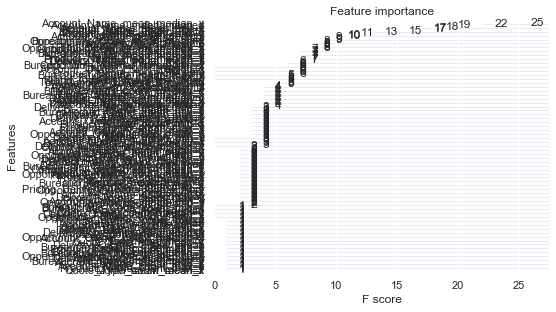

In [145]:
plot = xgb.plot_importance(xg_reg)
mplt.gcf().subplots_adjust(bottom=0.01)
fig = plot.get_figure()

In [146]:
# xg_reg.feature_importances_
testImportance = trainCSV
oportunity= testImportance["Opportunity_ID"]
for col,score in zip(x_train.columns,xg_reg.feature_importances_):
    if score < 0.0152:
        print(col,score)
        testImportance = testImportance.drop(columns=[col])
testImportance

Opportunity_ID 0.0013409858
ASP_sum 0.005492687
ASP_mean 2.3445346e-05
ASP_median 0.005575888
ASP_std 0.0
ASP_max 0.002978588
ASP_min 0.0
ASP_(converted)_sum 0.0012570785
ASP_(converted)_mean 0.0
ASP_(converted)_median 0.00025232183
ASP_(converted)_std 0.0
ASP_(converted)_max 0.0011295641
ASP_(converted)_min 0.0
TRF_sum 0.0
TRF_mean 3.0254365e-05
TRF_median 0.0010167868
TRF_std 0.001282182
TRF_max 0.0
TRF_min 0.0
Total_Amount_sum 0.00079952274
Total_Amount_mean 0.00094906613
Total_Amount_median 0.00095451856
Total_Amount_std 0.001878994
Total_Amount_max 0.0009385005
Total_Amount_min 0.000596385
Total_Taxable_Amount_sum 0.0019550652
Total_Taxable_Amount_mean 0.0
Total_Taxable_Amount_median 0.0012117127
Total_Taxable_Amount_std 0.0
Total_Taxable_Amount_max 0.0
Total_Taxable_Amount_min 0.0010053171
Total_Amount_converted_sum 0.0005479167
Total_Amount_converted_mean 0.0024328257
Total_Amount_converted_std 0.0
Total_Amount_converted_max 0.00047138173
Total_Amount_converted_min 0.0003261455


,Stage,Total_Amount_converted_median,Product_Name_mean_median_x,Account_Name_mean_mean_x,Account_Name_mean_median_x,Account_Name_mean_max_x,Account_Name_mean_min_x,Month_count_median_x,Product_Name_mean_mean_y,Product_Name_mean_median_y,Account_Name_mean_mean_y,Account_Name_mean_median_y,Account_Name_mean_max_y,Product_Family_mean_max_y,Month_count_median_y
0,0.0,5964043.80,0.323529,0.666667,0.666667,0.666667,0.666667,47.0,0.323529,0.323529,0.666667,0.666667,0.666667,0.280788,47.0
1,1.0,54552.68,0.326531,0.750000,0.750000,0.750000,0.750000,99.0,0.326531,0.326531,0.750000,0.750000,0.750000,0.284314,99.0
2,1.0,83865.60,1.000000,1.000000,1.000000,1.000000,1.000000,100.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.0
3,0.0,7421881.50,0.000000,0.000000,0.000000,0.000000,0.000000,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
4,0.0,13357192.50,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285,1.0,314650.00,0.769231,0.790321,0.790323,0.790997,0.789644,384.0,0.769194,0.769231,0.790321,0.790323,0.790997,0.858182,384.0
4286,1.0,235987.50,0.776119,0.791667,0.791667,0.791667,0.791667,194.0,0.776119,0.776119,0.791667,0.791667,0.791667,0.858696,194.0
4287,0.0,34068.00,0.731216,0.574789,0.574789,0.581395,0.568182,271.5,0.731216,0.731216,0.574789,0.574789,0.581395,0.368421,271.5
4288,1.0,2654.40,0.657895,0.792332,0.792332,0.792332,0.792332,555.0,0.657895,0.657895,0.792332,0.792332,0.792332,0.405556,555.0


In [147]:
#Split test reducido
# df_train =  dataset.drop(columns=["Source","ID","Region","Territory","Bureaucratic_Code","Account_Created_Date","Billing_Country","Account_Name","Opportunity_Name","Opportunity_ID","Sales_Contract_No","Account_Owner","Opportunity_Owner","Account_Type","Opportunity_Type","Quote_Type","Delivery_Terms","Opportunity_Created_Date","Brand","Product_Type","Size","Product_Category_B","Price","Currency","Last_Activity","Quote_Expiry_Date","Last_Modified_Date","Last_Modified_By","Product_Family","Product_Name","ASP_Currency","ASP","ASP_(converted)_Currency","ASP_(converted)","Planned_Delivery_Start_Date","Planned_Delivery_End_Date","Month","Delivery_Quarter","Delivery_Year","Actual_Delivery_Date","Total_Amount_Currency","Total_Amount","Total_Taxable_Amount_Currency","Total_Taxable_Amount","Prod_Category_A","conversion","conversion_diaria"	,"Total_Amount_USD"	,"Total_Taxable_Amount_USD"])

#Features de poca importancia para probar
df_train=testImportance


# df_train = df_train.drop(columns=["TRF_median","TRF_min","TRF_max","Account_Name_mean_median_y","Account_Name_mean_mean_y","Total_Amount_converted_median"])

Y = np.array(df_train['Stage']).astype(float) # prediction 
df_train = df_train.drop(columns=['Stage'])

X = df_train.astype(float) #Train local


x_train, x_test, y_train, y_test = train_test_split(X,Y)

In [148]:
xg_reg = xgb.XGBRegressor(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.2, max_depth = 5, alpha = 10, n_estimators = 200)
xg_reg.fit(x_train,y_train)
Y_pred = xg_reg.predict(x_test)
Y_pred_train = xg_reg.predict(x_train)
print(xg_reg.score(x_test,y_test))
print(xg_reg.score(x_train,y_train))
print(log_loss(y_train, Y_pred_train))
print(log_loss(y_test, Y_pred))

0.69302828664161
0.7511745402260572
0.20619775364473625
0.2503000443960989


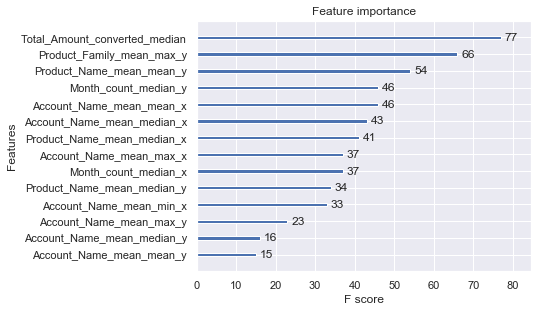

In [149]:
plot = xgb.plot_importance(xg_reg)
mplt.gcf().subplots_adjust(bottom=0.01)
fig = plot.get_figure()

In [150]:
#Rf Clasifier
classifier = RandomForestRegressor(n_estimators = 100 ,max_depth=2, random_state=0)
classifier.fit(x_train,y_train)
Y_pred = classifier.predict(x_test)
Y_pred_train = classifier.predict(x_train)
print(classifier.score(x_test,y_test))
print(classifier.score(x_train,y_train))
print(log_loss(y_train, Y_pred_train))
print(log_loss(y_test, Y_pred))


0.5451866839144431
0.598316221265486
0.3272695941611364
0.3648656479477027


In [151]:
# testImportance["Opportunity_ID"] =  oportunity

#Summit
testImportance

,Stage,Total_Amount_converted_median,Product_Name_mean_median_x,Account_Name_mean_mean_x,Account_Name_mean_median_x,Account_Name_mean_max_x,Account_Name_mean_min_x,Month_count_median_x,Product_Name_mean_mean_y,Product_Name_mean_median_y,Account_Name_mean_mean_y,Account_Name_mean_median_y,Account_Name_mean_max_y,Product_Family_mean_max_y,Month_count_median_y
0,0.0,5964043.80,0.323529,0.666667,0.666667,0.666667,0.666667,47.0,0.323529,0.323529,0.666667,0.666667,0.666667,0.280788,47.0
1,1.0,54552.68,0.326531,0.750000,0.750000,0.750000,0.750000,99.0,0.326531,0.326531,0.750000,0.750000,0.750000,0.284314,99.0
2,1.0,83865.60,1.000000,1.000000,1.000000,1.000000,1.000000,100.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.0
3,0.0,7421881.50,0.000000,0.000000,0.000000,0.000000,0.000000,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
4,0.0,13357192.50,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285,1.0,314650.00,0.769231,0.790321,0.790323,0.790997,0.789644,384.0,0.769194,0.769231,0.790321,0.790323,0.790997,0.858182,384.0
4286,1.0,235987.50,0.776119,0.791667,0.791667,0.791667,0.791667,194.0,0.776119,0.776119,0.791667,0.791667,0.791667,0.858696,194.0
4287,0.0,34068.00,0.731216,0.574789,0.574789,0.581395,0.568182,271.5,0.731216,0.731216,0.574789,0.574789,0.581395,0.368421,271.5
4288,1.0,2654.40,0.657895,0.792332,0.792332,0.792332,0.792332,555.0,0.657895,0.657895,0.792332,0.792332,0.792332,0.405556,555.0


In [152]:
y_train = testImportance["Stage"].astype(float)
x_train = testImportance.drop(columns=["Stage"]).astype(float)
x_train

,Total_Amount_converted_median,Product_Name_mean_median_x,Account_Name_mean_mean_x,Account_Name_mean_median_x,Account_Name_mean_max_x,Account_Name_mean_min_x,Month_count_median_x,Product_Name_mean_mean_y,Product_Name_mean_median_y,Account_Name_mean_mean_y,Account_Name_mean_median_y,Account_Name_mean_max_y,Product_Family_mean_max_y,Month_count_median_y
0,5964043.80,0.323529,0.666667,0.666667,0.666667,0.666667,47.0,0.323529,0.323529,0.666667,0.666667,0.666667,0.280788,47.0
1,54552.68,0.326531,0.750000,0.750000,0.750000,0.750000,99.0,0.326531,0.326531,0.750000,0.750000,0.750000,0.284314,99.0
2,83865.60,1.000000,1.000000,1.000000,1.000000,1.000000,100.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.0
3,7421881.50,0.000000,0.000000,0.000000,0.000000,0.000000,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
4,13357192.50,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285,314650.00,0.769231,0.790321,0.790323,0.790997,0.789644,384.0,0.769194,0.769231,0.790321,0.790323,0.790997,0.858182,384.0
4286,235987.50,0.776119,0.791667,0.791667,0.791667,0.791667,194.0,0.776119,0.776119,0.791667,0.791667,0.791667,0.858696,194.0
4287,34068.00,0.731216,0.574789,0.574789,0.581395,0.568182,271.5,0.731216,0.731216,0.574789,0.574789,0.581395,0.368421,271.5
4288,2654.40,0.657895,0.792332,0.792332,0.792332,0.792332,555.0,0.657895,0.657895,0.792332,0.792332,0.792332,0.405556,555.0


In [153]:
testCSV = pd.read_csv('C:/Users/Bangho/Desktop/Datos/Tp1PandasRec/Test_ECI_2020.csv',usecols=["Opportunity_ID","TRF"])
feturesTestCSV = pd.read_csv("./datos-tp2-2c2020-main/Features_agrupados_Test_Lucas.csv")
pd.set_option('display.max_columns', None)


testCSV = testCSV.groupby(['Opportunity_ID']).agg({'TRF':['mean']}).reset_index()
testCSV.columns=["Opportunity_ID","TRF"]
opportunity_test= testCSV["Opportunity_ID"]
testCSV = testCSV.merge(feturesTestCSV, right_on="Opportunity_ID",left_on= "Opportunity_ID")
testCSV = testCSV.fillna(-1)

common_cols = list(set(x_train.columns).intersection(testCSV.columns))
testCSV = testCSV[common_cols]
testCSV
x_train = x_train[common_cols]

In [154]:
x_test = testCSV.astype(float)

In [155]:
xg_reg = xgb.XGBRegressor(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.2, max_depth = 5, alpha = 10, n_estimators = 200)
xg_reg.fit(x_train,y_train)
Y_pred = xg_reg.predict(x_test)

In [156]:
df =pd.DataFrame()
df["Opportunity_ID"]= opportunity_test
df["Target"]= Y_pred
df.to_csv("Prediccion.csv",index= False)